<a href="https://colab.research.google.com/github/A01707504/Actividad-6-Regresi-n-No-Lineal-/blob/main/Actividad_6_(Regresi%C3%B3n_No_Lineal)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6 (Regresión No Lineal)**

### Analítica de datos y herramientas de inteligencia artificial II (Gpo 501)

**Profesor:** Alfredo García Suárez

**Alumno:** Ricardo Saldaña Muñoz | A01707504

***Fecha:*** 16 de octubre de 2023

In [141]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

Hecho esto cargamos el dataset que utilizaremos el cual tiene el nombre de cuentas_credicel.csv, y también definimos una opción con pd.set_option para que nos muestre todas las columnas del dataset y así poder visualizar cuales son los atributos significantes.

In [142]:
df = pd.read_csv('/content/cuentas_credicel.csv')
pd.set_option('display.max_columns', None)
df.head()

<ipython-input-142-25c24eafba98>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cuentas_credicel.csv')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,score_buro,razones_buro,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,0,0.0,0,NaN,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,NaN,NaN,NaN,0,0.0,0,NaN,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,NaN,NaN,Cancelado,0,0.0,0,NaN,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,NaN,NaN,NaN,0,0.0,0,NaN,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,05/03/2022 00:00,12/03/2022 00:00,Mora,0,0.0,0,NaN,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


Asimismo para entender mejor el dataset mostramos la descripción de cada una de las columnas que se contienen en el dataset.

1. **folio**: Número de identificación único de la cuenta.
2. **tag**: Etiqueta o categoría asociada a la cuenta.
3. **folio_solicitud**: Número de identificación único de la solicitud relacionada con la cuenta.
4. **fecha**: Fecha en la que se creó la cuenta.
5. **marca**: La marca del producto o vehículo financiado.
6. **modelo**: El modelo del producto o vehículo financiado.
7. **plazo**: El período de tiempo en el que se acordó pagar el préstamo o financiamiento.
8. **precio**: El precio total del producto o vehículo financiado.
9. **enganche**: La cantidad inicial que el cliente pagó como anticipo.
10. **descuento**: Cualquier descuento aplicado al precio del producto o vehículo.
11. **semana**: Número de la semana en la que se creó la cuenta.
12. **monto_financiado**: La cantidad financiada después de restar el enganche y descuentos del precio total.
13. **costo_total**: El costo total del préstamo o financiamiento, incluyendo intereses y comisiones.
14. **monto_accesorios**: Monto adicional asociado a accesorios o extras en el producto o vehículo.
15. **agente_venta**: El agente de ventas responsable de la transacción.
16. **dis_venta**: Distrito de ventas relacionado con la cuenta.
17. **status**: Estado actual de la cuenta (por ejemplo, activa, inactiva, cancelada, etc.).
18. **fraude**: Indicador de si la cuenta está relacionada con un caso de fraude.
19. **empresa**: Nombre de la empresa o institución financiera involucrada en la cuenta.
20. **inversion**: Cantidad de inversión realizada en la cuenta.
21. **pagos_realizados**: Número de pagos realizados hasta la fecha.
22. **reautorizacion**: Indicador de si la cuenta ha requerido una reautorización.
23. **fecha_ultimo_pago**: Fecha del último pago realizado.
24. **fecha_pago_proximo**: Fecha estimada del próximo pago.
25. **status_cuenta**: Estado actual de la cuenta (puede ser similar a 'status', pero con más detalles).
26. **puntos**: Puntuación o puntos asociados a la cuenta (puede ser un puntaje de crédito).
27. **riesgo**: Nivel de riesgo asociado a la cuenta.
28. **score_buro**: Puntuación o puntaje de buró de crédito del cliente.
29. **razones_buro**: Razones que explican el puntaje de buró de crédito.
30. **porc_eng**: Porcentaje de enganche con respecto al precio del producto o vehículo.
31. **limite_credito**: Límite de crédito asignado al cliente.
32. **semana_actual**: Número de la semana actual en relación con la cuenta.
33. **cp_cliente**: Código postal del cliente.
34. **edad_cliente**: Edad del cliente.
35. **cd_cliente**: Ciudad del cliente.
36. **edo_cliente**: Estado del cliente.
37. **cd_venta**: Ciudad de la venta.
38. **edo_venta**: Estado de la venta.
39. **curp**: Clave Única de Registro de Población del cliente (en México).

Imprimimos la información del dataset para poder observar la cantidad de columnas, cantidad de filas y tipo de variable de cada atributo. De igual manera al observar la información del dataset, observamos que hay columnas que tenían valores faltantes por lo que es necesario generar un tratamiento de los datos.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

Al observar la cantidad de nulos existentes en las múltiples columnas, vemos que es necesario tratar esos nulos de manera que ya no haya valores faltantes. Para su tratamiento eliminaremos todas las columnas que no sean cuantitativas y es por eso que definimos un código para que se muestren las columnas con valores nulos, así como la cantidad de valores nulos con los que se cuentan.

In [144]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
cp_cliente            7243
edad_cliente             9
edo_cliente              8
dtype: int64

Al observar que se necesitan generar 5 modelos de correlación No lineal y Analizar la correlación que existe entre las siguientes variables:
1. Riesgo (variable objetivo)
2. score_buro (variable objetivo)
3. porc_eng (variable objetivo)
4. limite_crédito (variable objetivo)

Es importante verificar que se tenga el tipo de variable correcto de estas ya que a partir de estas definiremos los modelos.

Observamos que la columna 'limite_credito' tiene valores cuantitativos pero es de tipo object debido a que existen dos registros que contienen 'SD', es por eso que primero cambiamos este caractér por 0, y después convertimos la columna a tipo float.

In [145]:
df['limite_credito'] = df['limite_credito'].replace('SD', 0)
df['limite_credito'] = df['limite_credito'].astype(float)

Eliminamos todas las columnas que sean de tipo object, y nos quedamos únicamente con las columnas que contengan valores cuantitativos.

In [146]:
columnas_a_eliminar = df.select_dtypes(include=['object']).columns
df = df.drop(columns=columnas_a_eliminar)

Observamos que hecho esto ya no contamos con valores nulos en ninguna de las columnas a excepción de la columna "edad_cliente", por lo que trataremos esos valores nulos con el promedio de todos los registros.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  int64  
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  int64  
 10  fraude            22735 non-null  int64  
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  int64  
 13  reautorizacion    22735 non-null  int64  
 14  puntos            22735 non-null  int64  
 15  riesgo            22735 non-null  float64
 16  score_buro        22735 non-null  int64 

In [148]:
promedio_edad = df['edad_cliente'].mean()
df['edad_cliente'].fillna(promedio_edad, inplace=True)

Confirmamos de nuevo que ya no existan valores nulos, y podemos decir que ya no contamos con ninguno e ninguna de las columnas cuantitativas.

In [149]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

Ya teniendo nuestro dataframe limpio, mostramos un boxplot para poder ver el comportamiento de los atributos.

<Figure size 1500x800 with 0 Axes>

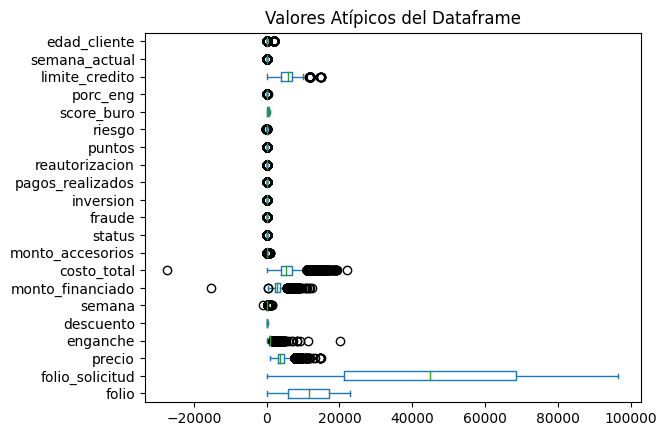

In [150]:
fig = plt.figure(figsize = (15, 8))
df.plot(kind="box", vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

Para poder tratar los valores atípicos utilizaremos el método de "Método Desviación Estándar" en el cual se encuentran los valores extremos.

In [151]:
y=df
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

Limite Superior Permitido folio                31323.107698
folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  48.354233
riesgo                  58.456322
score_buro            1142.021000
porc_eng                45.711306
limite_credito       12331.577603
semana_actual           64.380898
edad_cliente           422.315226
dtype: float64
Limite Inferior Permitido folio               -8301.055796
folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     

Como siguiente paso obtenemos los datos, y convertimos los outliers en nulos en el Dataframe.

In [152]:
df= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df.head(20)

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,0,25.01,0.0,NaN,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,33.0
5,8,49,2999.0,750.0,0.0,156.0,2249.0,4056.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,26.0,38.0
6,9,50,2999.0,900.0,0.0,145.0,2099.0,3770.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,30.01,6000.0,26.0,21.0
7,10,54,3999.0,1500.0,0.0,288.0,2499.0,3744.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,37.51,7000.0,13.0,45.0
8,11,59,2889.0,1000.0,0.0,131.0,1889.0,3406.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,34.61,7000.0,26.0,36.0
9,12,62,2999.0,750.0,0.0,156.0,2249.0,4056.0,0.0,1.0,0.0,0,15.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,47.0


Después lo que se realizó fue reemplazar los valores atípicos que se encuentran ahora como valores nulos con el promedio.

In [153]:
df = df.fillna(round(df.mean(),1))
df

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0,0.0,0.0,0.0,0.00,0,25.01,0.0,20.2,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,0.0,0.0,10.0,27.40,469,8.87,10000.0,0.0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,0.0,0.0,9.0,19.00,502,29.49,5000.0,0.0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,0.0,0.0,11.0,26.65,459,23.76,4750.0,0.0,36.0
22733,22970,96536,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0.0,0,0.0,0.0,14.0,-17.35,699,28.56,7000.0,0.0,53.0


Después para comprobar lo anteriormente realizado generamos un código que nos muestre la suma de todas las filas con valores nulos de cada columna, el cual nos muestra que no existen valores nulos.

In [154]:
valores_nulos = df.isnull().sum()
valores_nulos

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        0
dtype: int64

Hecho esto procedemos a elegir 5 modelos de correlación No lineal y Analizar la correlación que existe entre las siguientes variables aplicando la herramienta de “Regresión No Lineal”:

1. **Riesgo**(variable objetivo)
2. **score_buro** (variable objetivo)
3. **porc_eng** (variable objetivo)
4. **limite_crédito** (variable objetivo)



Primero para ver el comportamiento de las variables, graficamos todas las dispersiones entre todas las variables.

In [155]:
#sns.pairplot(df)

De igual manera además de observar las variables en los gráficos de dispersión mostramos una tabla de correlación con el fin de ver que variables tienen una alta correlación con las variables objetivo con las que se quiere realizar los modelos de regresión no lineal.

In [156]:
df.corr()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,1.000000,0.971332,0.089539,0.125603,0.134939,0.097617,0.070554,0.048342,0.105582,-0.401955,NaN,-0.139744,-0.462108,NaN,-0.120519,0.360565,0.548206,0.085404,-0.389241,-0.809617,-0.012752
folio_solicitud,0.971332,1.000000,0.090329,0.122568,0.131475,0.099369,0.072683,0.049955,0.094277,-0.391637,NaN,-0.130940,-0.453260,NaN,-0.136636,0.348446,0.527624,0.079580,-0.373411,-0.787954,-0.013639
precio,0.089539,0.090329,1.000000,0.690542,0.018582,0.611028,0.935647,0.838116,-0.024338,-0.097610,NaN,-0.009418,0.021131,NaN,0.072409,-0.042131,0.077478,-0.037848,0.071461,-0.007976,-0.078688
enganche,0.125603,0.122568,0.690542,1.000000,-0.025831,0.379107,0.515344,0.448240,-0.015719,-0.074212,NaN,-0.106344,-0.088180,NaN,-0.211252,0.300962,0.069650,0.550980,-0.363672,-0.085123,-0.106747
descuento,0.134939,0.131475,0.018582,-0.025831,1.000000,-0.019941,0.033970,0.050457,0.025154,-0.068609,NaN,0.243043,0.043343,NaN,-0.084649,0.044845,0.106815,-0.058823,-0.099430,-0.123154,-0.019187
semana,0.097617,0.099369,0.611028,0.379107,-0.019941,1.000000,0.602361,0.351682,-0.014543,0.140207,NaN,0.016371,-0.116870,NaN,0.084549,-0.071684,0.060466,-0.115531,0.097151,-0.174343,-0.027617
monto_financiado,0.070554,0.072683,0.935647,0.515344,0.033970,0.602361,1.000000,0.880544,-0.014844,-0.104128,NaN,0.031904,0.054574,NaN,0.164210,-0.173172,0.073016,-0.253541,0.215092,0.020533,-0.058117
costo_total,0.048342,0.049955,0.838116,0.448240,0.050457,0.351682,0.880544,1.000000,0.006631,-0.191657,NaN,0.026717,0.120742,NaN,0.154028,-0.170579,0.077757,-0.256799,0.216293,0.098423,-0.055271
monto_accesorios,0.105582,0.094277,-0.024338,-0.015719,0.025154,-0.014543,-0.014844,0.006631,1.000000,-0.041099,NaN,-0.022554,-0.055976,NaN,-0.028959,0.059309,0.061045,0.000023,-0.054168,-0.085508,0.003137
status,-0.401955,-0.391637,-0.097610,-0.074212,-0.068609,0.140207,-0.104128,-0.191657,-0.041099,1.000000,NaN,0.091192,0.296808,NaN,0.072987,-0.163089,-0.229747,-0.012792,0.157092,-0.003240,0.067626


## **Variable Objetivo - Riesgo**



## **Modelo 1**
- Variable Objetivo = riesgo
- Variable Independiente = porc_eng
- Función = (a * x ** 2 + b)/ c * x (Función cuadrática)

En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [157]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["riesgo"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [158]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["riesgo"])
parametros


array([ 6.49770497e-02, -1.53619380e+01,  9.97956364e+01])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [159]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,35.572571
1,22.550667
2,6.335779
3,6.335779
4,6.335779
...,...
22730,-0.911014
22731,12.158806
22732,5.076017
22733,10.771462


Graficamos las predicciones y los datos originales para realizar la comparación

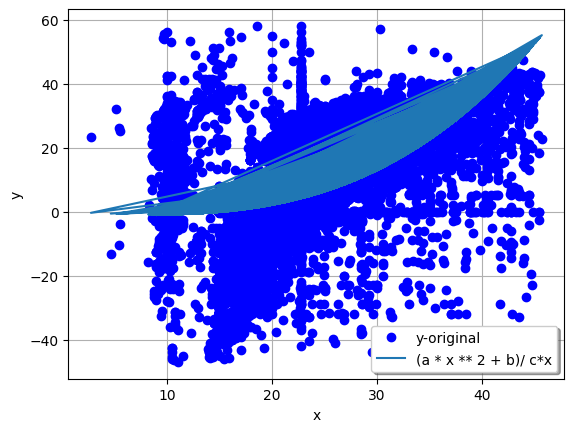

In [160]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [161]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

0.20630541596602903

In [162]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.4542085599876218

Al observar el modelo vemos que al tener un valor de 0.4542 como coeficiente de correlación es un poco bajo

## **Modelo 2**
- Variable Objetivo = riesgo
- Variable Independiente = limite_credito
- Función = a/b * x ** 2 + c * x (Función polinomial inversa)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [163]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["riesgo"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [164]:
def func1 (x, a, b, c):
  return a/b*x**2 + c*x

parametros, covs = curve_fit(func1, df["limite_credito"], df["riesgo"])
parametros


array([-4.66866167e-06,  5.54771282e+00,  6.31351707e-03])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [165]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x
yfit1

,limite_credito
0,10.528908
1,7.585407
2,0.000000
3,2.958811
4,2.958811
...,...
22730,-21.019540
22731,10.528908
22732,11.001799
22733,2.958811


Graficamos las predicciones y los datos originales para realizar la comparación

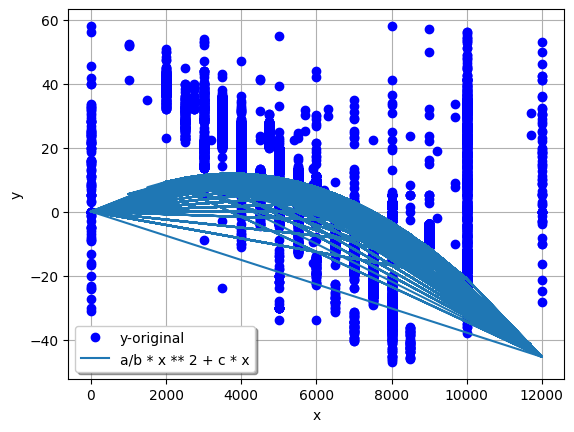

In [166]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a/b * x ** 2 + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [167]:
R2_m1_2 = r2_score(y, yfit1)
R2_m1_2

0.33166440796904473

In [168]:
corr_m1_2 = np.sqrt(abs(R2_m1_2))
corr_m1_2

0.5759031237708689

## **Modelo 3**
- Variable Objetivo = riesgo
- Variable Independiente = puntos
- Función = 1/a * x ** 2 (Función cuadrática inversa)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [169]:
Vars_Indep = df[["puntos"]]
Var_Dep = df[["riesgo"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [170]:
def func1 (x, a):
  return 1/a * x ** 2

parametros, covs = curve_fit(func1, df["puntos"], df["riesgo"])
parametros


array([6.20573215e+08])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [171]:
parametros, _ = curve_fit(func1, df["puntos"], df["riesgo"])
a= parametros[ 0 ]
yfit1 = 1/a * x ** 2
yfit1

,puntos
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
22730,1.611413e-07
22731,1.305245e-07
22732,1.949810e-07
22733,3.158370e-07


Graficamos las predicciones y los datos originales para realizar la comparación

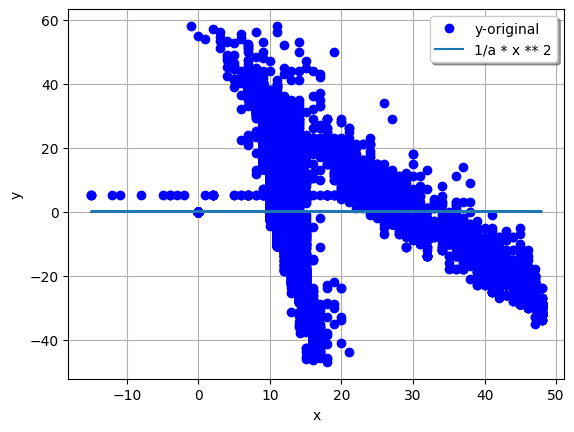

In [172]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "1/a * x ** 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [173]:
R2_m1_3 = r2_score(y, yfit1)
R2_m1_3

-0.09086266005999466

In [174]:
corr_m1_3 = np.sqrt(abs(R2_m1_3))
corr_m1_3

0.3014343378913468

## **Modelo 4**
- Variable Objetivo = riesgo
- Variable Independiente = enganche
- Función = a * x + b * x + c * x (Función lineal con producto de coeficientes)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [175]:
Vars_Indep = df[["enganche"]]
Var_Dep = df[["riesgo"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [176]:
def func1 (x, a, b, c):
  return a * x + b * x + c * x

parametros, covs = curve_fit(func1, df["enganche"], df["riesgo"])
parametros


array([  70.71295557,   70.71295557, -141.4188614 ])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [177]:
parametros, _ = curve_fit(func1, df["enganche"], df["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x + b * x + c * x
yfit1

,enganche
0,5.498797
1,7.402227
2,3.454373
3,3.454373
4,7.578471
...,...
22730,2.093773
22731,8.523136
22732,8.121301
22733,6.327847


Graficamos las predicciones y los datos originales para realizar la comparación

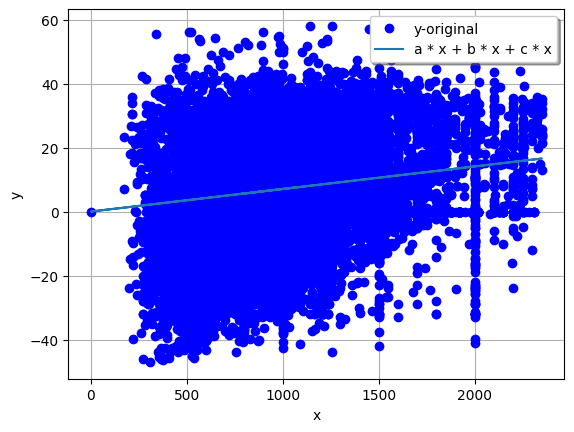

In [178]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a * x + b * x + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [179]:
R2_m1_4 = r2_score(y, yfit1)
R2_m1_4

0.06395402800632088

In [180]:
corr_m1_4 = np.sqrt(abs(R2_m1_4))
corr_m1_4

0.2528913363607399

## **Modelo 5**
- Variable Objetivo = riesgo
- Variable Independiente = pagos_realizados
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [181]:
Vars_Indep = df[["pagos_realizados"]]
Var_Dep = df[["riesgo"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [182]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["pagos_realizados"], df["riesgo"])
parametros


array([-100.3621691 ,   99.90945246,    9.73394828])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [183]:
parametros, _ = curve_fit(func1, df["pagos_realizados"], df["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,pagos_realizados
0,9.733948
1,9.733948
2,9.733948
3,9.733948
4,9.733948
...,...
22730,9.733948
22731,9.733948
22732,9.733948
22733,9.733948


Graficamos las predicciones y los datos originales para realizar la comparación

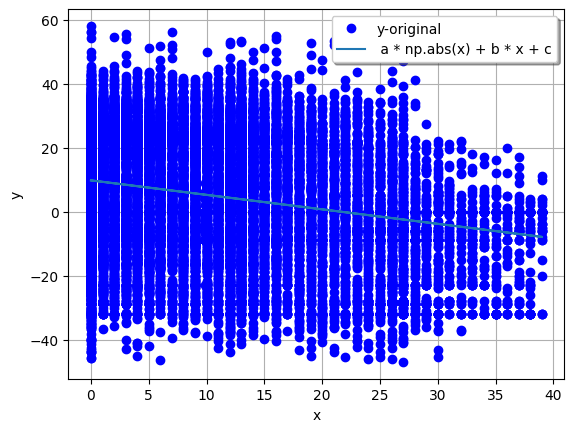

In [184]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = " a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [185]:
R2_m1_5 = r2_score(y, yfit1)
R2_m1_5

0.05796553952138128

In [186]:
corr_m1_5 = np.sqrt(abs(R2_m1_5))
corr_m1_5

0.2407603362711169

## **Resumen de las variables analizadas**

Una vez generado los 5 modelos para la variable dependiente "riesgo" creamos un dataframe en donde podamos comparar el análisis generado para cada modelo.

In [187]:
resumen1 = pd.DataFrame()
variable_dependiente = ['riesgo', 'riesgo', 'riesgo', 'riesgo', 'riesgo' ]
variable_independiente = ['porc_eng', 'limite_credito', 'puntos', 'enganche', 'pagos_realizados']
funcion = ['(a * x ** 2 + b)/ c * x (Función cuadrática)', 'a/b * x ** 2 + c * x (Función polinomial inversa)',
         '1/a * x ** 2 (Función cuadrática inversa)', ' a * x + b * x + c * x (Función lineal con producto de coeficientes)',
         'a * np.abs(x) + b * x + c (Función Valor absoluto)']
coef_determinacion = [R2_m1_1, R2_m1_2, R2_m1_3, R2_m1_4, R2_m1_5]
coef_correlacion = [corr_m1_1, corr_m1_2, corr_m1_3, corr_m1_4, corr_m1_5]

resumen1['Variable Dependiente'] = variable_dependiente
resumen1['Variable Independiente'] = variable_independiente
resumen1['Funcion Utilizada'] = funcion
resumen1['R2'] = coef_determinacion
resumen1['Correlacion'] = coef_correlacion

resumen1

,Variable Dependiente,Variable Independiente,Funcion Utilizada,R2,Correlacion
0,riesgo,porc_eng,(a * x ** 2 + b)/ c * x (Función cuadrática),0.206305,0.454209
1,riesgo,limite_credito,a/b * x ** 2 + c * x (Función polinomial inversa),0.331664,0.575903
2,riesgo,puntos,1/a * x ** 2 (Función cuadrática inversa),-0.090863,0.301434
3,riesgo,enganche,a * x + b * x + c * x (Función lineal con pro...,0.063954,0.252891
4,riesgo,pagos_realizados,a * np.abs(x) + b * x + c (Función Valor absol...,0.057966,0.240760


## **Variable Objetivo - score_buro**  


## **Modelo 1**
- Variable Objetivo = score_buro
- Variable Independiente = status
- Función = (a * x ** 2 + b)/ c * x (Función cuadrática)

En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [188]:
Vars_Indep = df[["status"]]
Var_Dep = df[["score_buro"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [189]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["status"], df["score_buro"])
parametros


array([-120.09012924,  612.6225951 ,    1.51060914])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [190]:
parametros, _ = curve_fit(func1, df["status"], df["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,status
0,175.110921
1,175.110921
2,349.283847
3,175.110921
4,326.048913
...,...
22730,326.048913
22731,326.048913
22732,326.048913
22733,326.048913


Graficamos las predicciones y los datos originales para realizar la comparación

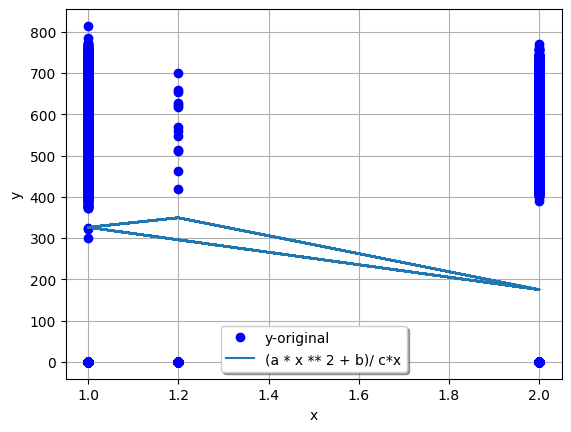

In [191]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [192]:
R2_m2_1 = r2_score(y, yfit1)
R2_m2_1

0.050314180009614184

In [193]:
corr_m2_1 = np.sqrt(abs(R2_m2_1))
corr_m2_1

0.22430822546133744

Al observar el modelo vemos que al tener un valor de 0.4542 como coeficiente de correlación es un poco bajo

## **Modelo 2**
- Variable Objetivo = score_buro
- Variable Independiente = pagos_realizados
- Función = a/b * x ** 2 + c * x (Función polinomial inversa)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [194]:
Vars_Indep = df[["pagos_realizados"]]
Var_Dep = df[["score_buro"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [195]:
def func1 (x, a, b, c):
  return a/b*x**2 + c*x

parametros, covs = curve_fit(func1, df["pagos_realizados"], df["score_buro"])
parametros


array([-2.30073618,  1.64767714, 44.86391789])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [196]:
parametros, _ = curve_fit(func1, df["pagos_realizados"], df["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x
yfit1

,pagos_realizados
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
22730,0.0
22731,0.0
22732,0.0
22733,0.0


Graficamos las predicciones y los datos originales para realizar la comparación

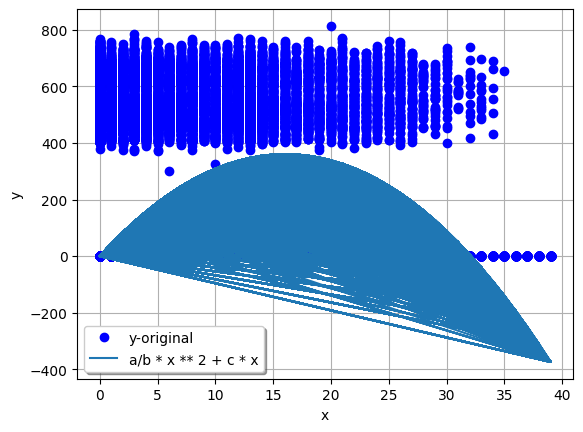

In [197]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a/b * x ** 2 + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [198]:
R2_m2_2 = r2_score(y, yfit1)
R2_m2_2

-0.34036415088408223

In [199]:
corr_m2_2 = np.sqrt(abs(R2_m2_2))
corr_m2_2

0.5834073627270077

## **Modelo 3**
- Variable Objetivo = score_buro
- Variable Independiente = puntos
- Función = 1/a * x ** 2 (Función cuadrática inversa)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [200]:
Vars_Indep = df[["puntos"]]
Var_Dep = df[["score_buro"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [201]:
def func1 (x, a):
  return 1/a * x ** 2

parametros, covs = curve_fit(func1, df["puntos"], df["score_buro"])
parametros


array([10.02902945])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [202]:
parametros, _ = curve_fit(func1, df["puntos"], df["score_buro"])
a= parametros[ 0 ]
yfit1 = 1/a * x ** 2
yfit1

,puntos
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,9.971055
22731,8.076554
22732,12.064976
22733,19.543267


Graficamos las predicciones y los datos originales para realizar la comparación

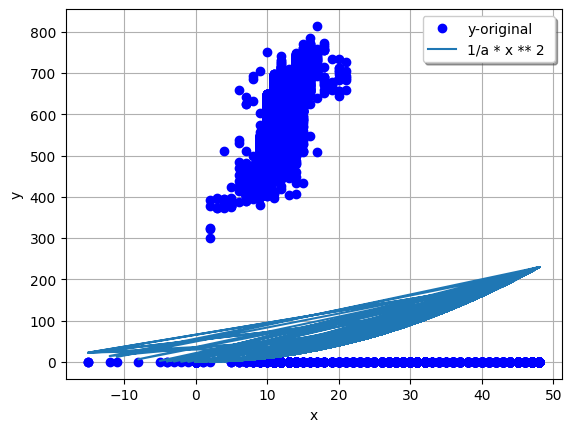

In [203]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "1/a * x ** 2 ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [204]:
R2_m2_3 = r2_score(y, yfit1)
R2_m2_3

-0.9923108815101143

In [205]:
corr_m2_3 = np.sqrt(abs(R2_m2_3))
corr_m2_3

0.9961480218873671

## **Modelo 4**
- Variable Objetivo = score_buro
- Variable Independiente = semana_actual
- Función = a * x + b * x + c * x (Función lineal con producto de coeficientes)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [206]:
Vars_Indep = df[["semana_actual"]]
Var_Dep = df[["score_buro"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [207]:
def func1 (x, a, b, c):
  return a * x + b * x + c * x

parametros, covs = curve_fit(func1, df["semana_actual"], df["score_buro"])
parametros


array([-68.45510966, -68.4548369 , 143.67706108])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [208]:
parametros, _ = curve_fit(func1, df["semana_actual"], df["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x + b * x + c * x
yfit1

,semana_actual
0,175.944978
1,87.972489
2,136.695713
3,87.972489
4,136.695713
...,...
22730,0.000000
22731,0.000000
22732,0.000000
22733,0.000000


Graficamos las predicciones y los datos originales para realizar la comparación

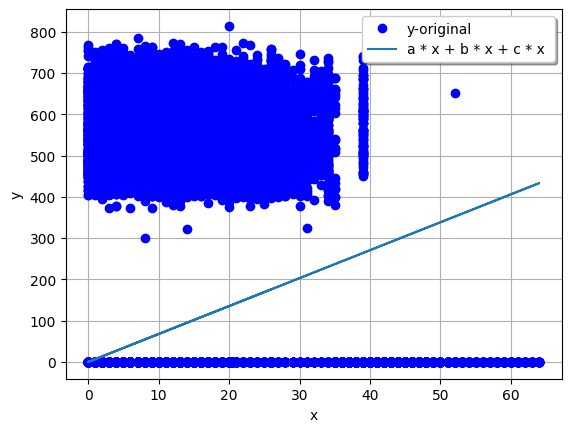

In [209]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a * x + b * x + c * x ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [210]:
R2_m2_4 = r2_score(y, yfit1)
R2_m2_4

-0.6989491432571875

In [211]:
corr_m2_4 = np.sqrt(abs(R2_m2_4))
corr_m2_4

0.8360317836405429

## **Modelo 5**
- Variable Objetivo = score_buro
- Variable Independiente = limite_credito
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [212]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["score_buro"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [213]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["limite_credito"], df["score_buro"])
parametros


array([  99.98978337, -100.0102179 ,  410.86507058])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [214]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,limite_credito
0,308.692439
1,288.257912
2,410.865071
3,267.823386
4,267.823386
...,...
22730,206.519807
22731,308.692439
22732,313.801070
22733,267.823386


Graficamos las predicciones y los datos originales para realizar la comparación

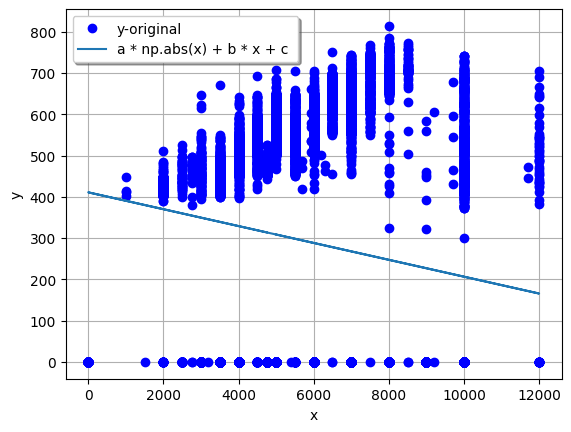

In [215]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a * np.abs(x) + b * x + c ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [216]:
R2_m2_5 = r2_score(y, yfit1)
R2_m2_5

0.023515987359793433

In [217]:
corr_m2_5 = np.sqrt(abs(R2_m2_5))
corr_m2_5

0.1533492333198749

## **Resumen de las variables analizadas**

Una vez generado los 5 modelos para la variable dependiente "score_buro" creamos un dataframe en donde podamos comparar el análisis generado para cada modelo.

In [218]:
resumen2 = pd.DataFrame()
variable_dependiente = ['score_buro', 'score_buro', 'score_buro', 'score_buro', 'score_buro']
variable_independiente = ['status', 'pagos_realizados', 'puntos', 'semana_actual', 'limite_credito']
funcion = ['(a * x ** 2 + b)/ c * x (Función cuadrática)', 'a/b * x ** 2 + c * x (Función polinomial inversa)',
         '1/a * x ** 2 (Función cuadrática inversa)', ' a * x + b * x + c * x (Función lineal con producto de coeficientes)',
         'a * np.abs(x) + b * x + c (Función Valor absoluto)']
coef_determinacion = [R2_m2_1, R2_m2_2, R2_m2_3, R2_m2_4, R2_m2_5]
coef_correlacion = [corr_m2_1, corr_m2_2, corr_m2_3, corr_m2_4, corr_m2_5]

resumen2['Variable Dependiente'] = variable_dependiente
resumen2['Variable Independiente'] = variable_independiente
resumen2['Funcion Utilizada'] = funcion
resumen2['R2'] = coef_determinacion
resumen2['Correlacion'] = coef_correlacion

resumen2

,Variable Dependiente,Variable Independiente,Funcion Utilizada,R2,Correlacion
0,score_buro,status,(a * x ** 2 + b)/ c * x (Función cuadrática),0.050314,0.224308
1,score_buro,pagos_realizados,a/b * x ** 2 + c * x (Función polinomial inversa),-0.340364,0.583407
2,score_buro,puntos,1/a * x ** 2 (Función cuadrática inversa),-0.992311,0.996148
3,score_buro,semana_actual,a * x + b * x + c * x (Función lineal con pro...,-0.698949,0.836032
4,score_buro,limite_credito,a * np.abs(x) + b * x + c (Función Valor absol...,0.023516,0.153349


## **Variable Objetivo - porc_eng**  


## **Modelo 1**
- Variable Objetivo = porc_eng
- Variable Independiente = enganche
- Función = (a * x ** 2 + b)/ c * x (Función cuadrática)

En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [219]:
Vars_Indep = df[["enganche"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [220]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["enganche"], df["porc_eng"])
parametros


array([-4.89226575e-07,  3.63306194e+00,  1.21996796e+02])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [221]:
parametros, _ = curve_fit(func1, df["enganche"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,enganche
0,21.325354
1,26.626717
2,14.120398
3,14.120398
4,27.031669
...,...
22730,8.739595
22731,28.917351
22732,28.175708
22733,23.830427


Graficamos las predicciones y los datos originales para realizar la comparación

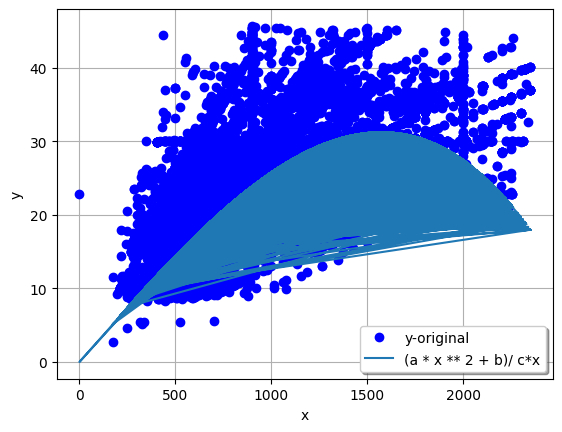

In [222]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [223]:
R2_m3_1 = r2_score(y, yfit1)
R2_m3_1

0.07608532652184552

In [224]:
corr_m3_1 = np.sqrt(abs(R2_m3_1))
corr_m3_1

0.2758356875421408

Al observar el modelo vemos que al tener un valor de 0.4542 como coeficiente de correlación es un poco bajo

## **Modelo 2**
- Variable Objetivo = porc_eng
- Variable Independiente = costo_total
- Función = a/b * x ** 2 + c * x (Función polinomial inversa)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [225]:
Vars_Indep = df[["costo_total"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [226]:
def func1 (x, a, b, c):
  return a/b*x**2 + c*x

parametros, covs = curve_fit(func1, df["costo_total"], df["porc_eng"])
parametros


array([-5.43791868e-06,  9.16513608e+00,  7.76304548e-03])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [227]:
parametros, _ = curve_fit(func1, df["costo_total"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x
yfit1

,costo_total
0,13.717430
1,17.630628
2,14.258464
3,14.258464
4,25.297845
...,...
22730,24.731195
22731,24.324286
22732,25.385078
22733,24.853514


Graficamos las predicciones y los datos originales para realizar la comparación

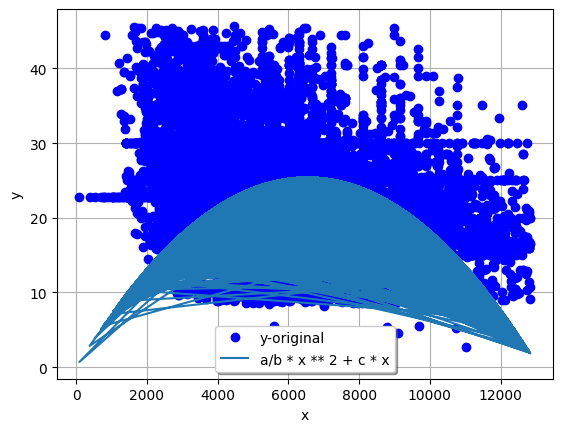

In [228]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a/b * x ** 2 + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [229]:
R2_m3_2 = r2_score(y, yfit1)
R2_m3_2

-0.48572641868255406

In [230]:
corr_m3_2 = np.sqrt(abs(R2_m3_2))
corr_m3_2

0.6969407569388908

## **Modelo 3**
- Variable Objetivo = porc_eng
- Variable Independiente = puntos
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [231]:
Vars_Indep = df[["puntos"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [232]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["puntos"], df["porc_eng"])
parametros


array([ 0.07102213, -0.3017238 , 26.07345392])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [233]:
parametros, _ = curve_fit(func1, df["puntos"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,puntos
0,26.073454
1,26.073454
2,26.073454
3,26.073454
4,26.073454
...,...
22730,23.766437
22731,23.997139
22732,23.535736
22733,22.843631


Graficamos las predicciones y los datos originales para realizar la comparación

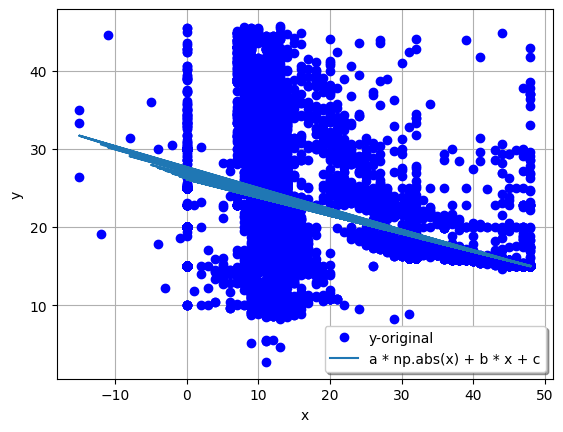

In [234]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [235]:
R2_m3_3 = r2_score(y, yfit1)
R2_m3_3

0.1868628566685312

In [236]:
corr_m3_3 = np.sqrt(abs(R2_m3_3))
corr_m3_3

0.4322763660767625

## **Modelo 4**
- Variable Objetivo = porc_eng
- Variable Independiente = riesgo
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [237]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [238]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["riesgo"], df["porc_eng"])
parametros


array([-0.04531242,  0.19799638, 22.41888547])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [239]:
parametros, _ = curve_fit(func1, df["riesgo"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,riesgo
0,22.418885
1,22.418885
2,22.418885
3,22.418885
4,22.418885
...,...
22730,26.602426
22731,25.319881
22732,26.487913
22733,18.197478


Graficamos las predicciones y los datos originales para realizar la comparación

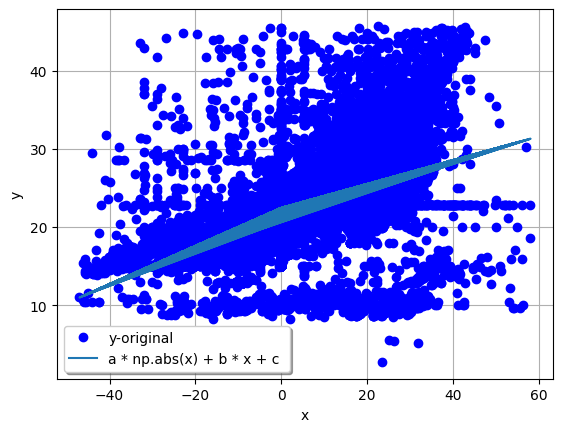

In [240]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a * np.abs(x) + b * x + c ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [241]:
R2_m3_4 = r2_score(y, yfit1)
R2_m3_4

0.29749202666257435

In [242]:
corr_m3_4 = np.sqrt(abs(R2_m3_4))
corr_m3_4

0.5454282965363774

## **Modelo 5**
- Variable Objetivo = porc_eng
- Variable Independiente = limite_credito
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [243]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [244]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["limite_credito"], df["porc_eng"])
parametros


array([-100.00094947,   99.99905179,   34.03773678])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [245]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,limite_credito
0,24.549348
1,22.651671
2,34.037737
3,20.753993
4,20.753993
...,...
22730,15.060960
22731,24.549348
22732,25.023768
22733,20.753993


Graficamos las predicciones y los datos originales para realizar la comparación

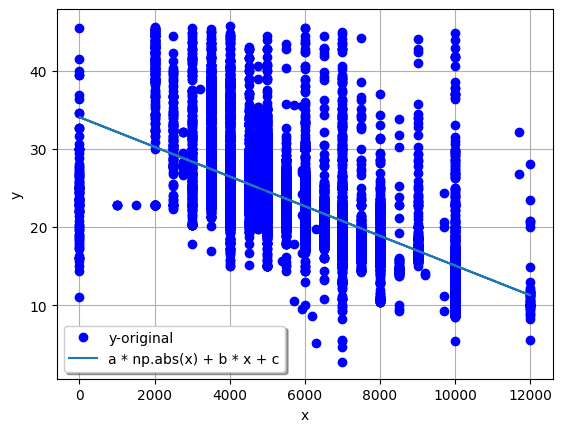

In [246]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [247]:
R2_m3_5 = r2_score(y, yfit1)
R2_m3_5

0.4421100439158173

In [248]:
corr_m3_5 = np.sqrt(abs(R2_m3_5))
corr_m3_5

0.6649135612362086

## **Resumen de las variables analizadas**

Una vez generado los 5 modelos para la variable dependiente "porc_eng" creamos un dataframe en donde podamos comparar el análisis generado para cada modelo.

In [249]:
resumen3 = pd.DataFrame()
variable_dependiente = ['porc_eng', 'porc_eng', 'porc_eng', 'porc_eng', 'porc_eng']
variable_independiente = ['enganche', 'costo_total', 'puntos', 'riesgo', 'limite_credito']
funcion = ['(a * x ** 2 + b)/ c * x (Función cuadrática)', 'a/b * x ** 2 + c * x (Función polinomial inversa)',
         'a * np.abs(x) + b * x + c (Función Valor absoluto)', ' a * np.abs(x) + b * x + c (Función Valor absoluto)',
         'a * np.abs(x) + b * x + c (Función Valor absoluto)']
coef_determinacion = [R2_m3_1, R2_m3_2, R2_m3_3, R2_m3_4, R2_m3_5]
coef_correlacion = [corr_m3_1, corr_m3_2, corr_m3_3, corr_m3_4, corr_m3_5]

resumen3['Variable Dependiente'] = variable_dependiente
resumen3['Variable Independiente'] = variable_independiente
resumen3['Funcion Utilizada'] = funcion
resumen3['R2'] = coef_determinacion
resumen3['Correlacion'] = coef_correlacion

resumen3

,Variable Dependiente,Variable Independiente,Funcion Utilizada,R2,Correlacion
0,porc_eng,enganche,(a * x ** 2 + b)/ c * x (Función cuadrática),0.076085,0.275836
1,porc_eng,costo_total,a/b * x ** 2 + c * x (Función polinomial inversa),-0.485726,0.696941
2,porc_eng,puntos,a * np.abs(x) + b * x + c (Función Valor absol...,0.186863,0.432276
3,porc_eng,riesgo,a * np.abs(x) + b * x + c (Función Valor abso...,0.297492,0.545428
4,porc_eng,limite_credito,a * np.abs(x) + b * x + c (Función Valor absol...,0.442110,0.664914


## **Variable Objetivo - limite_credito**



## **Modelo 1**
- Variable Objetivo = limite_credito
- Variable Independiente = porc_eng
- Función = (a * x ** 2 + b)/ c * x (Función cuadrática)

En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [250]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [251]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["limite_credito"])
parametros


array([-9.86323783e+02,  1.64105417e+06,  4.09055376e+03])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [252]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,600.293094
1,3698.378574
2,6261.488318
3,6261.488318
4,6261.488318
...,...
22730,3390.208585
22731,5646.950603
22732,6297.797277
22733,5840.643233


Graficamos las predicciones y los datos originales para realizar la comparación

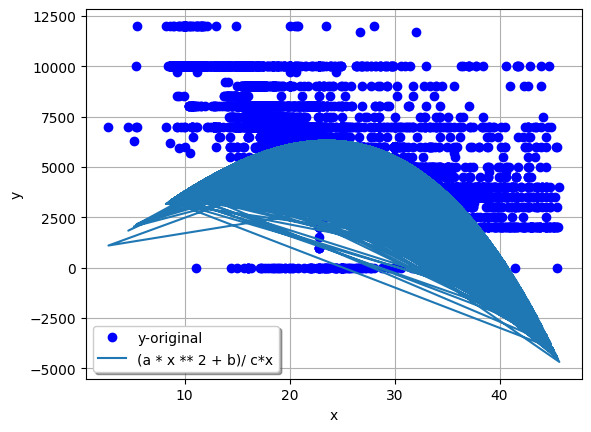

In [253]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [254]:
R2_m4_1 = r2_score(y, yfit1)
R2_m4_1

-0.37798981768760354

In [255]:
corr_m4_1 = np.sqrt(abs(R2_m4_1))
corr_m4_1

0.6148087651356343

## **Modelo 2**
- Variable Objetivo = limite_credito
- Variable Independiente = riesgo
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [256]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [257]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["riesgo"], df["limite_credito"])
parametros


array([   7.30686283,  -91.693929  , 6293.3881923 ])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [258]:
parametros, _ = curve_fit(func1, df["riesgo"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,riesgo
0,6293.388192
1,6293.388192
2,6293.388192
3,6293.388192
4,6293.388192
...,...
22730,3981.182579
22731,4690.033935
22732,4044.472879
22733,8011.051931


Graficamos las predicciones y los datos originales para realizar la comparación

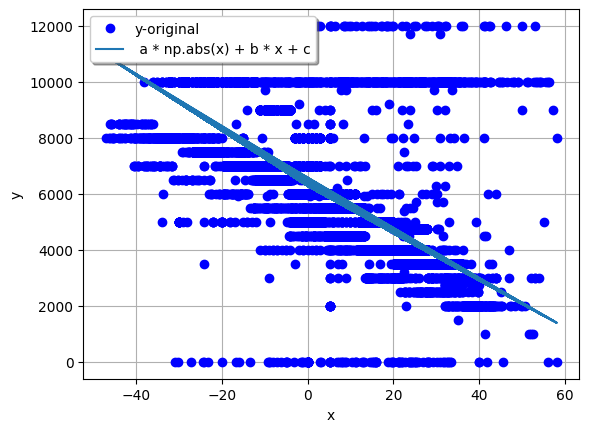

In [259]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = " a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [260]:
R2_m4_2 = r2_score(y, yfit1)
R2_m4_2

0.5433568037029719

In [261]:
corr_m4_2 = np.sqrt(abs(R2_m4_2))
corr_m4_2

0.7371273999133202

## **Modelo 3**
- Variable Objetivo = limite_credito
- Variable Independiente = puntos
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [262]:
Vars_Indep = df[["puntos"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [263]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["puntos"], df["limite_credito"])
parametros


array([ 138.53413541,  -41.4638979 , 4542.11706908])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [264]:
parametros, _ = curve_fit(func1, df["puntos"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,puntos
0,4542.117069
1,4542.117069
2,4542.117069
3,4542.117069
4,4542.117069
...,...
22730,5512.819444
22731,5415.749207
22732,5609.889682
22733,5901.100394


Graficamos las predicciones y los datos originales para realizar la comparación

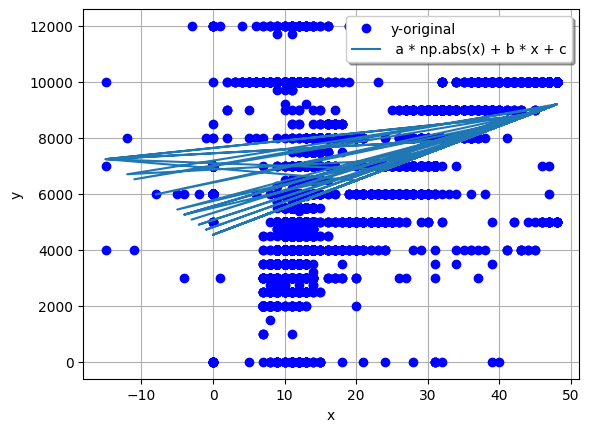

In [265]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = " a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [266]:
R2_m4_3 = r2_score(y, yfit1)
R2_m4_3

0.2686982855298934

In [267]:
corr_m4_3 = np.sqrt(abs(R2_m4_3))
corr_m4_3

0.518361153569491

## **Modelo 4**
- Variable Objetivo = limite_credito
- Variable Independiente = semana_actual
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [268]:
Vars_Indep = df[["semana_actual"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [269]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["semana_actual"], df["limite_credito"])
parametros


array([-191.52273191,  243.37008324, 4867.73491873])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [270]:
parametros, _ = curve_fit(func1, df["semana_actual"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,semana_actual
0,6215.766053
1,5541.750486
2,5915.051415
3,5541.750486
4,5915.051415
...,...
22730,4867.734919
22731,4867.734919
22732,4867.734919
22733,4867.734919


Graficamos las predicciones y los datos originales para realizar la comparación

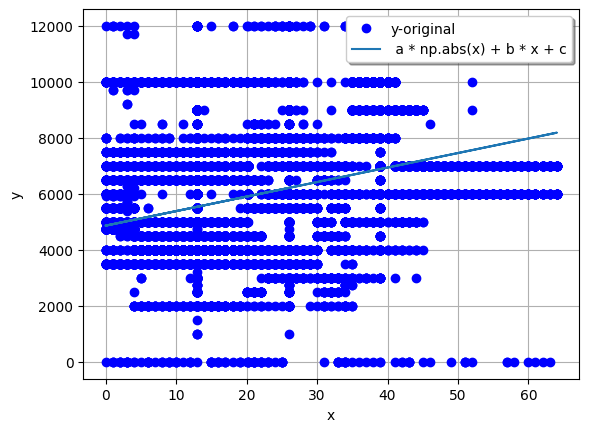

In [271]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = " a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [272]:
R2_m4_4 = r2_score(y, yfit1)
R2_m4_4

0.11547139282255892

In [273]:
corr_m4_4 = np.sqrt(abs(R2_m4_4))
corr_m4_4

0.33981081916642814

## **Modelo 5**
- Variable Objetivo = limite_credito
- Variable Independiente = pagos_realizados
- Función = a * np.abs(x) + b * x + c (Función Valor absoluto)



En este código declaramos las variables independientes y dependientes para la regresión No lineal, así como las redefinimos.

In [274]:
Vars_Indep = df[["pagos_realizados"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

Definimos la función que realizaremos así como ajustamos los parámetros de la función curve_fit y obtenemos los coeficientes del modelo,

In [275]:
def func1 (x, a, b, c):
  return a * np.abs(x) + b * x + c

parametros, covs = curve_fit(func1, df["pagos_realizados"], df["limite_credito"])
parametros


array([ -34.0215798 ,   91.21632049, 5349.82664093])

Creamos el modelo de predicción con los parámetros obtenidos y al final calculamos las predicciones y reestructuramos el vector de predicciones.

In [276]:
parametros, _ = curve_fit(func1, df["pagos_realizados"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * np.abs(x) + b * x + c
yfit1

,pagos_realizados
0,5349.826641
1,5349.826641
2,5349.826641
3,5349.826641
4,5349.826641
...,...
22730,5349.826641
22731,5349.826641
22732,5349.826641
22733,5349.826641


Graficamos las predicciones y los datos originales para realizar la comparación

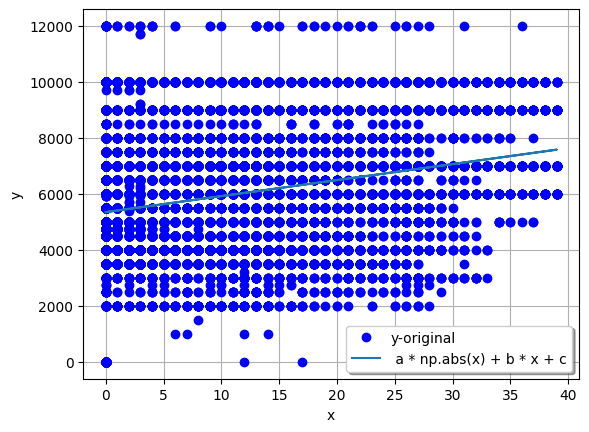

In [277]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = " a * np.abs(x) + b * x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

Ya visto el gráfico y su comportamiento, ahora calculamos el coeficiente de determinación y el coeficiente de correlación del modelo.

In [278]:
R2_m4_5 = r2_score(y, yfit1)
R2_m4_5

0.061647566002267284

In [279]:
corr_m4_5 = np.sqrt(abs(R2_m4_5))
corr_m4_5

0.24828927887097196

## **Resumen de las variables analizadas**

Una vez generado los 5 modelos para la variable dependiente "limite_credito" creamos un dataframe en donde podamos comparar el análisis generado para cada modelo.

In [280]:
resumen4 = pd.DataFrame()
variable_dependiente = ['limite_credito', 'limite_credito', 'limite_credito', 'limite_credito', 'limite_credito' ]
variable_independiente = ['porc_eng', 'riesgo', 'puntos', 'semana_actual', 'pagos_realizados']
funcion = ['(a * x ** 2 + b)/ c * x (Función cuadrática)', 'a * np.abs(x) + b * x + c (Función Valor absoluto)',
         'a * np.abs(x) + b * x + c (Función Valor absoluto)', 'a * np.abs(x) + b * x + c (Función Valor absoluto)',
         'a * np.abs(x) + b * x + c (Función Valor absoluto)']
coef_determinacion = [R2_m4_1, R2_m4_2, R2_m4_3, R2_m4_4, R2_m4_5]
coef_correlacion = [corr_m4_1, corr_m4_2, corr_m4_3, corr_m4_4, corr_m4_5]

resumen4['Variable Dependiente'] = variable_dependiente
resumen4['Variable Independiente'] = variable_independiente
resumen4['Funcion Utilizada'] = funcion
resumen4['R2'] = coef_determinacion
resumen4['Correlacion'] = coef_correlacion

resumen4

,Variable Dependiente,Variable Independiente,Funcion Utilizada,R2,Correlacion
0,limite_credito,porc_eng,(a * x ** 2 + b)/ c * x (Función cuadrática),-0.377990,0.614809
1,limite_credito,riesgo,a * np.abs(x) + b * x + c (Función Valor absol...,0.543357,0.737127
2,limite_credito,puntos,a * np.abs(x) + b * x + c (Función Valor absol...,0.268698,0.518361
3,limite_credito,semana_actual,a * np.abs(x) + b * x + c (Función Valor absol...,0.115471,0.339811
4,limite_credito,pagos_realizados,a * np.abs(x) + b * x + c (Función Valor absol...,0.061648,0.248289
